<a href="https://colab.research.google.com/github/sam-evg/TelecomX_Latam/blob/main/TelecomX_latam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
# 📌 EXTRACCIÓN DE DATOS: Cargar JSON desde GitHub y convertir a DataFrame
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
response.raise_for_status()
data = response.json()

df = pd.json_normalize(data)
print("Tamaño del DataFrame:", df.shape)
df.head()


Tamaño del DataFrame: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##Parte 1: Exploración de estructura

In [2]:
# Exploración inicial del DataFrame
print("Información general del DataFrame:")
df.info()

print("\nTipos de datos por columna:")
print(df.dtypes)

print("\nResumen estadístico general:")
display(df.describe(include='all'))

print("\nDistribución de clientes según la variable Churn:")
if 'Churn' in df.columns:
    print(df['Churn'].value_counts(normalize=True) * 100)
else:
    print("La columna 'Churn' no se encuentra en el DataFrame.")


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.Tech

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN



Distribución de clientes según la variable Churn:
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


##Parte 2: Diagnóstico de columnas anidadas



In [3]:
# Verificación de estructuras internas en cada columna
for col in df.columns:
    tipos = df[col].apply(type).value_counts()
    print(f"\nColumna: {col}")
    print(tipos)



Columna: customerID
customerID
<class 'str'>    7267
Name: count, dtype: int64

Columna: Churn
Churn
<class 'str'>    7267
Name: count, dtype: int64

Columna: customer.gender
customer.gender
<class 'str'>    7267
Name: count, dtype: int64

Columna: customer.SeniorCitizen
customer.SeniorCitizen
<class 'int'>    7267
Name: count, dtype: int64

Columna: customer.Partner
customer.Partner
<class 'str'>    7267
Name: count, dtype: int64

Columna: customer.Dependents
customer.Dependents
<class 'str'>    7267
Name: count, dtype: int64

Columna: customer.tenure
customer.tenure
<class 'int'>    7267
Name: count, dtype: int64

Columna: phone.PhoneService
phone.PhoneService
<class 'str'>    7267
Name: count, dtype: int64

Columna: phone.MultipleLines
phone.MultipleLines
<class 'str'>    7267
Name: count, dtype: int64

Columna: internet.InternetService
internet.InternetService
<class 'str'>    7267
Name: count, dtype: int64

Columna: internet.OnlineSecurity
internet.OnlineSecurity
<class 'str'>   

##Parte 3: Expansión de columnas tipo dict

In [4]:
import pandas as pd

# Crear copia limpia del DataFrame
df_clean = df.copy()

# Columnas que contienen diccionarios
columnas_dict = ['customer', 'phone', 'internet', 'account']

# Expandir cada columna tipo dict en subcolumnas planas
for col in columnas_dict:
    if col in df_clean.columns:
        try:
            expanded = pd.json_normalize(df_clean[col])
            expanded.columns = [f"{col}_{sub}" for sub in expanded.columns]
            df_clean = df_clean.drop(columns=[col]).join(expanded)
            print(f"Columna '{col}' expandida correctamente.")
        except Exception as e:
            print(f"Error al expandir la columna '{col}': {e}")
    else:
        print(f"Columna '{col}' no encontrada en el DataFrame.")

print("\nColumnas actuales del DataFrame limpio:")
print(df_clean.columns.tolist())


Columna 'customer' no encontrada en el DataFrame.
Columna 'phone' no encontrada en el DataFrame.
Columna 'internet' no encontrada en el DataFrame.
Columna 'account' no encontrada en el DataFrame.

Columnas actuales del DataFrame limpio:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


##Parte 4: Limpieza de valores nulos, tipos y duplicados

In [5]:
# Renombrar columnas originales con puntos reales del JSON
df_clean.rename(columns={
    'account.Charges.Monthly': 'account_charges_monthly',
    'account.Charges.Total': 'account_charges_total'
}, inplace=True)

# Verificar si existen
cols_montos = ['account_charges_monthly', 'account_charges_total']
for col in cols_montos:
    if col not in df_clean.columns:
        print(f"Advertencia: la columna '{col}' no está disponible.")
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Mostrar valores nulos
print("\nValores nulos después de conversión:")
for col in cols_montos:
    if col in df_clean.columns:
        print(f"{col}: {df_clean[col].isnull().sum()} nulos")



Valores nulos después de conversión:
account_charges_monthly: 0 nulos
account_charges_total: 11 nulos


In [6]:
# Verificación y creación de la columna 'cuentas_diarias'
if 'account_charges_monthly' in df_clean.columns:
    # Asegurar que esté en formato numérico
    df_clean['account_charges_monthly'] = pd.to_numeric(df_clean['account_charges_monthly'], errors='coerce')

    # Crear columna de cálculo diario
    df_clean['cuentas_diarias'] = (df_clean['account_charges_monthly'] / 30).round(2)

    # Vista previa
    print("Columna 'cuentas_diarias' creada correctamente.")
    print(df_clean[['account_charges_monthly', 'cuentas_diarias']].head())
else:
    print("No se encontró la columna 'account_charges_monthly'. No se pudo crear 'cuentas_diarias'.")


Columna 'cuentas_diarias' creada correctamente.
   account_charges_monthly  cuentas_diarias
0                     65.6             2.19
1                     59.9             2.00
2                     73.9             2.46
3                     98.0             3.27
4                     83.9             2.80


###Punto 1: Conversión de valores "Yes"/"No" a 1 y 0 (binarización)

In [7]:
# Detectar columnas con solo "Yes" y "No"
columnas_binarias = []
for col in df_clean.columns:
    if df_clean[col].dropna().isin(['Yes', 'No']).all():
        columnas_binarias.append(col)

# Mostrar columnas a convertir
print("Columnas que serán binarizadas:", columnas_binarias)

# Reemplazar "Yes" por 1 y "No" por 0
df_clean[columnas_binarias] = df_clean[columnas_binarias].replace({'Yes': 1, 'No': 0})

# Verificar resultado
print(df_clean[columnas_binarias].head())


Columnas que serán binarizadas: ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']
   customer.Partner  customer.Dependents  phone.PhoneService  \
0                 1                    1                   1   
1                 0                    0                   1   
2                 0                    0                   1   
3                 1                    0                   1   
4                 1                    0                   1   

   account.PaperlessBilling  
0                         1  
1                         0  
2                         1  
3                         1  
4                         1  


/tmp/ipython-input-7-624726415.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[columnas_binarias] = df_clean[columnas_binarias].replace({'Yes': 1, 'No': 0})


###Punto 2: Renombrar columnas a nombres descriptivos (en español)

In [8]:
# Diccionario actualizado de renombramiento (con guión bajo en lugar de punto)
renombrar_columnas = {
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'es_adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'meses_como_cliente',
    'phone_PhoneService': 'servicio_telefonico',
    'phone_MultipleLines': 'multiples_lineas',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_en_linea',
    'internet_DeviceProtection': 'proteccion_dispositivo',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'tv_streaming',
    'internet_StreamingMovies': 'peliculas_streaming',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_electronica',
    'account_PaymentMethod': 'metodo_pago'
}

# Aplicar renombramiento
df_clean.rename(columns=renombrar_columnas, inplace=True)

# Mostrar columnas actualizadas
print("Columnas actualizadas:")
for col in df_clean.columns:
    print(col)

import numpy as np

# Si la columna 'Churn' existe, crear 'abandono' correctamente
if 'Churn' in df_clean.columns:
    df_clean['abandono'] = df_clean['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
    df_clean = df_clean.dropna(subset=['abandono'])
    df_clean['abandono'] = df_clean['abandono'].astype(int)
    print("Columna 'abandono' creada a partir de 'Churn'.")
else:
    print("La columna 'Churn' no existe en el DataFrame.")




Columnas actualizadas:
customerID
Churn
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
account.PaymentMethod
account_charges_monthly
account_charges_total
cuentas_diarias
Columna 'abandono' creada a partir de 'Churn'.


/tmp/ipython-input-8-1943165036.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['abandono'] = df_clean['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-8-1943165036.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['abandono'] = df_clean['abandono'].astype(int)


In [9]:
# Reemplazar puntos por guiones bajos en todos los nombres de columna
df_clean.columns = df_clean.columns.str.replace('.', '_', regex=False)

# Mostrar las nuevas columnas ordenadas
print("Columnas actualizadas:")
for col in df_clean.columns:
    print(col)


Columnas actualizadas:
customerID
Churn
customer_gender
customer_SeniorCitizen
customer_Partner
customer_Dependents
customer_tenure
phone_PhoneService
phone_MultipleLines
internet_InternetService
internet_OnlineSecurity
internet_OnlineBackup
internet_DeviceProtection
internet_TechSupport
internet_StreamingTV
internet_StreamingMovies
account_Contract
account_PaperlessBilling
account_PaymentMethod
account_charges_monthly
account_charges_total
cuentas_diarias
abandono


In [10]:
print("Columnas actuales del DataFrame:")
print(df_clean.columns.tolist())
print("\nValores únicos en 'abandono':")
print(df_clean['abandono'].unique())


Columnas actuales del DataFrame:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_charges_monthly', 'account_charges_total', 'cuentas_diarias', 'abandono']

Valores únicos en 'abandono':
[0 1]


#📊 Carga y análisis

##Estadísticas generales de variables numéricas

In [11]:
# Seleccionar columnas numéricas
df_numerico = df_clean.select_dtypes(include=['int64', 'float64'])

# Calcular estadísticas básicas
estadisticas = df_numerico.describe().T  # Transponer para mayor claridad
estadisticas['mediana'] = df_numerico.median()
estadisticas['varianza'] = df_numerico.var()
estadisticas['desviacion_estandar'] = df_numerico.std()

# Redondear a 3 decimales
estadisticas_redondeadas = estadisticas.round(3)

# Mostrar resumen con columnas clave ordenadas
columnas_mostrar = ['count', 'mean', 'mediana', 'std', 'varianza', 'min', '25%', '50%', '75%', 'max']
print("Resumen estadístico de variables numéricas (3 decimales):")
display(estadisticas_redondeadas[columnas_mostrar])


Resumen estadístico de variables numéricas (3 decimales):


,count,mean,mediana,std,varianza,min,25%,50%,75%,max
customer_SeniorCitizen,7043.0,0.162,0.000,0.369,0.136,0.00,0.00,0.000,0.000,1.00
customer_Partner,7043.0,0.483,0.000,0.500,0.250,0.00,0.00,0.000,1.000,1.00
customer_Dependents,7043.0,0.300,0.000,0.458,0.210,0.00,0.00,0.000,1.000,1.00
customer_tenure,7043.0,32.371,29.000,24.559,603.168,0.00,9.00,29.000,55.000,72.00
phone_PhoneService,7043.0,0.903,1.000,0.296,0.087,0.00,1.00,1.000,1.000,1.00
account_PaperlessBilling,7043.0,0.592,1.000,0.491,0.242,0.00,0.00,1.000,1.000,1.00
account_charges_monthly,7043.0,64.762,70.350,30.090,905.411,18.25,35.50,70.350,89.850,118.75
account_charges_total,7032.0,2283.300,1397.475,2266.771,5138252.407,18.80,401.45,1397.475,3794.738,8684.80
cuentas_diarias,7043.0,2.159,2.340,1.003,1.006,0.61,1.18,2.340,2.990,3.96
abandono,7043.0,0.265,0.000,0.442,0.195,0.00,0.00,0.000,1.000,1.00


##Bloque: Visualización de abandono (evasión)

/tmp/ipython-input-12-4191090241.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_abandono.index, y=conteo_abandono.values, palette='pastel')


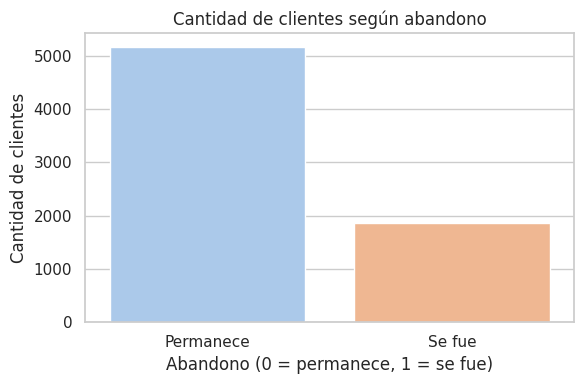

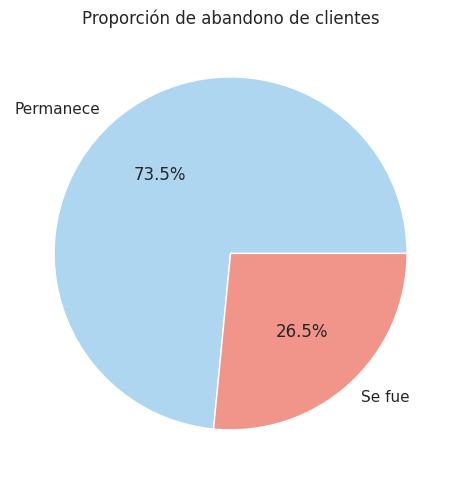

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paso 1: Reemplazar valores vacíos por NaN
df_clean['abandono'] = df_clean['abandono'].replace('', np.nan)

# Paso 2: Convertir valores 'Yes'/'No' a 1 y 0
df_clean['abandono'] = df_clean['abandono'].replace({'Yes': 1, 'No': 0})

# Paso 3: Eliminar filas con valores nulos en 'abandono'
df_clean = df_clean.dropna(subset=['abandono'])

# Paso 4: Asegurar que sea tipo entero
df_clean['abandono'] = df_clean['abandono'].astype(int)

# Paso 5: Crear gráfico de barras
conteo_abandono = df_clean['abandono'].value_counts().sort_index()

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_abandono.index, y=conteo_abandono.values, palette='pastel')
plt.title('Cantidad de clientes según abandono')
plt.xlabel('Abandono (0 = permanece, 1 = se fue)')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['Permanece', 'Se fue'])
plt.tight_layout()
plt.show()

# Paso 6: Gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(conteo_abandono.values, labels=['Permanece', 'Se fue'], autopct='%1.1f%%', colors=['#AED6F1', '#F1948A'])
plt.title('Proporción de abandono de clientes')
plt.tight_layout()
plt.show()


In [13]:
print(df_clean.columns.tolist())


['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_charges_monthly', 'account_charges_total', 'cuentas_diarias', 'abandono']


##Recuento de evasión por variables categóricas

In [14]:
# Lista corregida de variables categóricas
variables_categoricas = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_TechSupport',
    'internet_StreamingTV'
]

# Mostrar proporción de abandono para cada categoría dentro de cada variable
for var in variables_categoricas:
    if var in df_clean.columns:
        print(f"\nDistribución de abandono por: {var}")
        tabla = df_clean.groupby(var)['abandono'].value_counts(normalize=True).unstack().fillna(0)
        tabla.columns = ['% Permanece', '% Se fue']
        tabla = (tabla * 100).round(2)
        display(tabla.sort_values('% Se fue', ascending=False))
    else:
        print(f"Variable no encontrada en el DataFrame: {var}")



Distribución de abandono por: customer_gender


,% Permanece,% Se fue
customer_gender,,
Female,73.08,26.92
Male,73.84,26.16



Distribución de abandono por: account_Contract


,% Permanece,% Se fue
account_Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



Distribución de abandono por: account_PaymentMethod


,% Permanece,% Se fue
account_PaymentMethod,,
Electronic check,54.71,45.29
Mailed check,80.89,19.11
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24



Distribución de abandono por: internet_InternetService


,% Permanece,% Se fue
internet_InternetService,,
Fiber optic,58.11,41.89
DSL,81.04,18.96
No,92.60,7.40



Distribución de abandono por: internet_OnlineSecurity


,% Permanece,% Se fue
internet_OnlineSecurity,,
No,58.23,41.77
Yes,85.39,14.61
No internet service,92.60,7.40



Distribución de abandono por: internet_TechSupport


,% Permanece,% Se fue
internet_TechSupport,,
No,58.36,41.64
Yes,84.83,15.17
No internet service,92.60,7.40



Distribución de abandono por: internet_StreamingTV


,% Permanece,% Se fue
internet_StreamingTV,,
No,66.48,33.52
Yes,69.93,30.07
No internet service,92.60,7.40


In [15]:
# Diccionario mínimo para renombrar columnas categóricas clave
df_clean.rename(columns={
    'account_Contract': 'tipo_contrato',
    'account_PaymentMethod': 'metodo_pago',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'tv_streaming',
    'customer_gender': 'genero'
}, inplace=True)


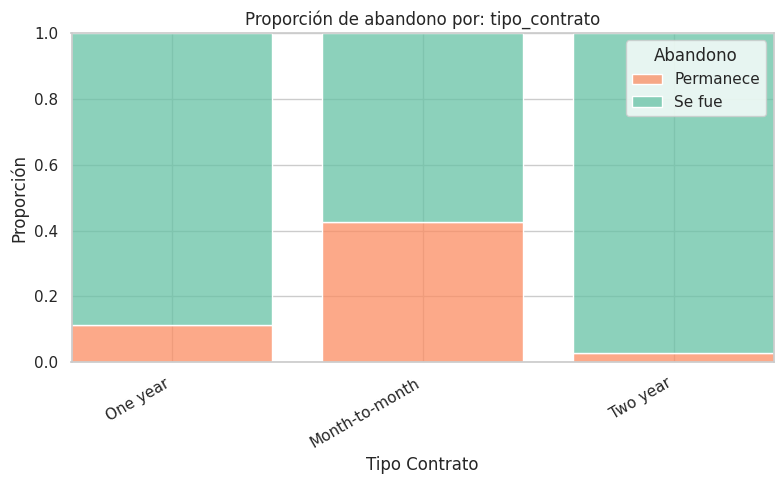

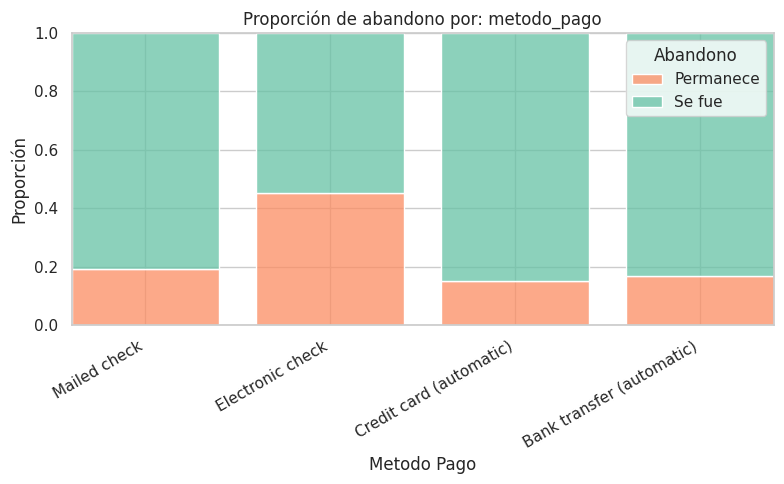

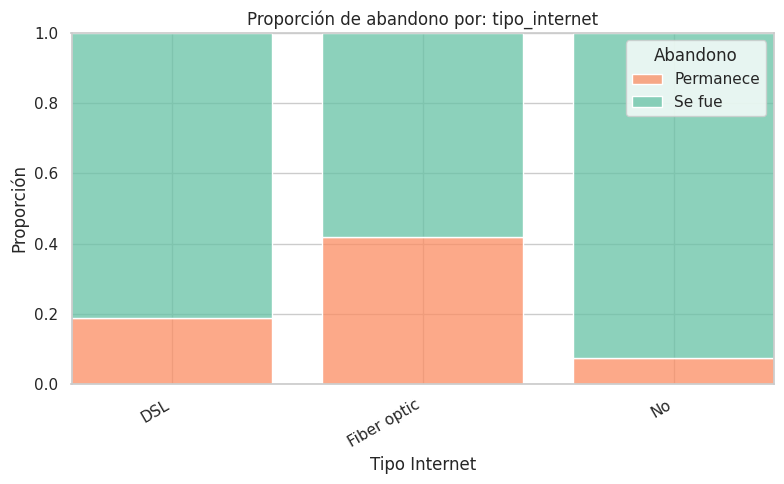

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables a graficar
variables_a_graficar = ['tipo_contrato', 'metodo_pago', 'tipo_internet']

# Estilo visual
sns.set(style="whitegrid")

# Crear un gráfico para cada variable
for var in variables_a_graficar:
    if var in df_clean.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.histplot(
            data=df_clean,
            x=var,
            hue='abandono',
            multiple='fill',
            shrink=0.8,
            palette='Set2',
            stat='probability'
        )
        plt.title(f'Proporción de abandono por: {var}')
        plt.ylabel('Proporción')
        plt.xlabel(var.replace('_', ' ').title())
        plt.xticks(rotation=30, ha='right')
        plt.legend(title='Abandono', labels=['Permanece', 'Se fue'])
        plt.tight_layout()
        plt.show()
    else:
        print(f"Variable no encontrada: {var}")


##Conteo de evasión por variables numéricas

In [17]:
# Variables numéricas corregidas según tus columnas reales
variables_numericas = [
    'customer_tenure',
    'account_charges_total',
    'account_charges_monthly',
    'cuentas_diarias'
]

# Calcular resumen estadístico agrupado por abandono
resumen_numerico = df_clean.groupby('abandono')[variables_numericas].agg(['mean', 'median', 'std']).round(3)

# Transponer para mejor legibilidad
resumen_numerico = resumen_numerico.transpose()

# Mostrar resultado
print("Resumen estadístico de variables numéricas agrupado por abandono:")
display(resumen_numerico)


Resumen estadístico de variables numéricas agrupado por abandono:


abandono                               0         1
customer_tenure         mean      37.570    17.979
                        median    38.000    10.000
                        std       24.114    19.531
account_charges_total   mean    2555.344  1531.796
                        median  1683.600   703.550
                        std     2329.457  1890.823
account_charges_monthly mean      61.265    74.441
                        median    64.425    79.650
                        std       31.093    24.666
cuentas_diarias         mean       2.042     2.481
                        median     2.150     2.660
                        std        1.036     0.822

/tmp/ipython-input-18-3825775474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='abandono', y=var, palette='pastel')


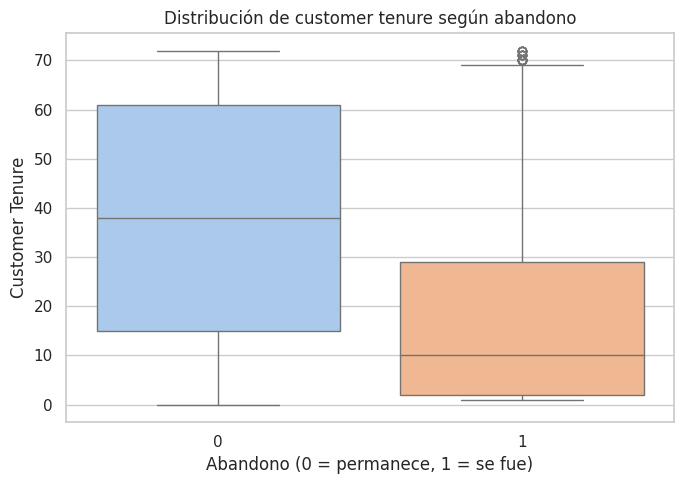

/tmp/ipython-input-18-3825775474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='abandono', y=var, palette='pastel')


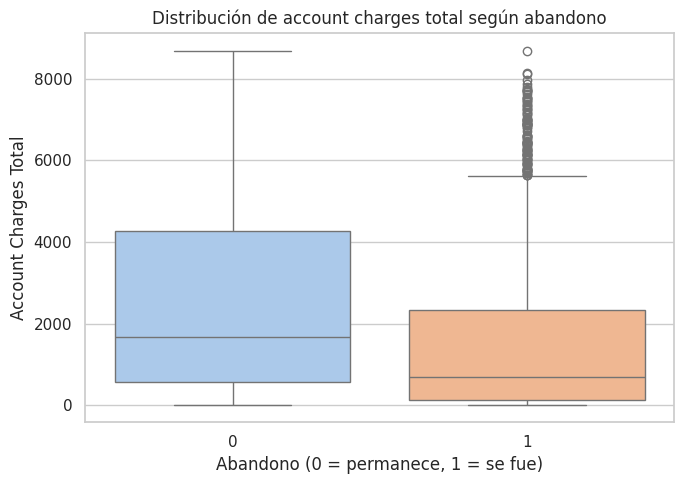

/tmp/ipython-input-18-3825775474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='abandono', y=var, palette='pastel')


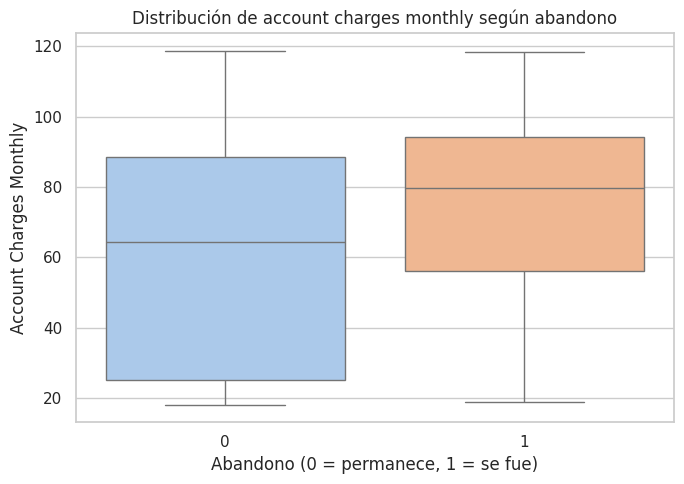

/tmp/ipython-input-18-3825775474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='abandono', y=var, palette='pastel')


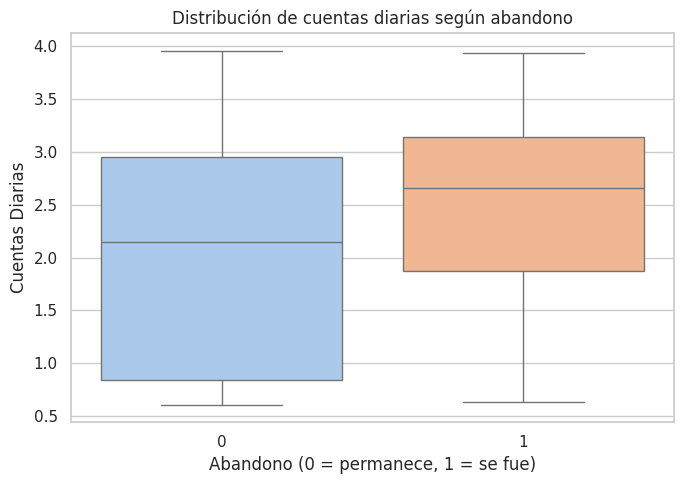

In [18]:
# boxplots comparativos
for var in variables_numericas:
    if var in df_clean.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df_clean, x='abandono', y=var, palette='pastel')
        plt.title(f'Distribución de {var.replace("_", " ")} según abandono')
        plt.xlabel('Abandono (0 = permanece, 1 = se fue)')
        plt.ylabel(var.replace('_', ' ').title())
        plt.tight_layout()
        plt.show()
    else:
        print(f"Variable no encontrada: {var}")

##BLOQUE OPCIONAL – Análisis de correlación

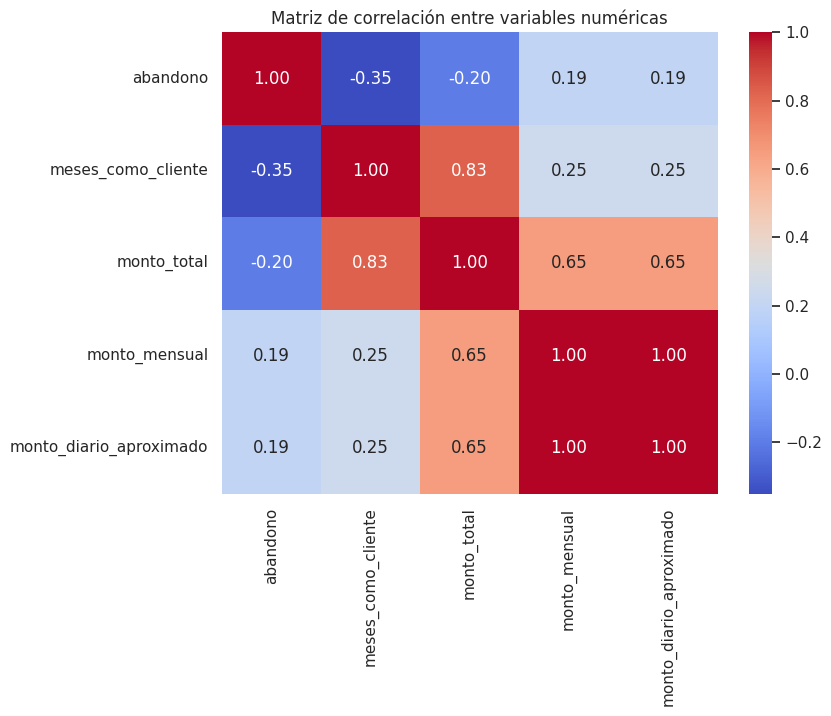

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas relevantes para la correlación
variables_correlacion = [
    'abandono',
    'meses_como_cliente',
    'monto_total',
    'monto_mensual',
    'monto_diario_aproximado'
]

# Convertir todas a numérico si fuera necesario
for col in variables_correlacion:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Calcular matriz de correlación
matriz_corr = df_clean[variables_correlacion].corr()

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


##Cantidad de servicios contratados

In [34]:
# Columnas que indican contratación de servicios (Yes/No convertidos a 1/0)
columnas_servicios = [
    'servicio_telefonico',
    'multiples_lineas',
    'seguridad_en_linea',
    'respaldo_en_linea',
    'proteccion_dispositivo',
    'soporte_tecnico',
    'tv_streaming',
    'peliculas_streaming'
]

# Asegurar que sean numéricas
for col in columnas_servicios:
    df_clean[col] = df_clean[col].replace({'Yes': 1, 'No': 0})
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Sumar servicios por fila
df_clean['cantidad_servicios'] = df_clean[columnas_servicios].sum(axis=1)

# Ver primeras filas
df_clean[['cantidad_servicios', 'abandono']].head()


,cantidad_servicios,abandono
0,4.0,0
1,3.0,0
2,2.0,1
3,5.0,1
4,3.0,1


##Correlación con Cantidad Servicios

In [35]:
# Correlación directa con 'abandono'
print("Correlación entre cantidad de servicios y abandono:")
print(df_clean[['cantidad_servicios', 'abandono']].corr())


Correlación entre cantidad de servicios y abandono:
                    cantidad_servicios  abandono
cantidad_servicios            1.000000 -0.067264
abandono                     -0.067264  1.000000


##Gráfico de dispersión



/tmp/ipython-input-36-2111280579.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='abandono', y='cantidad_servicios', palette='Set2')


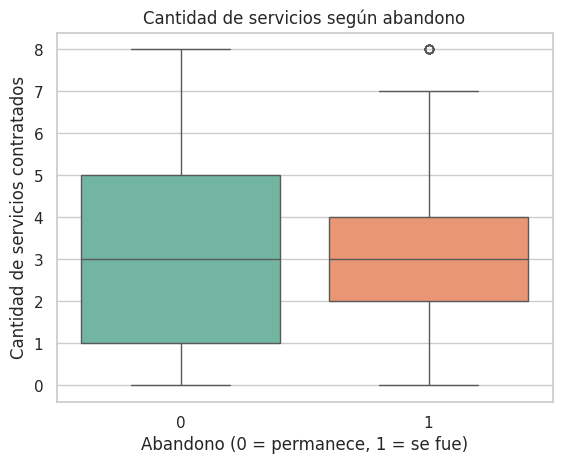

In [36]:
sns.boxplot(data=df_clean, x='abandono', y='cantidad_servicios', palette='Set2')
plt.title('Cantidad de servicios según abandono')
plt.xlabel('Abandono (0 = permanece, 1 = se fue)')
plt.ylabel('Cantidad de servicios contratados')
plt.show()


#📄Informe final

# 📊 Informe Final – Análisis de Evasión de Clientes en Telecom X

   ## 🔹 Introducción

El presente análisis tiene como objetivo estudiar la **evasión de clientes (Churn)** en la empresa **Telecom X**, identificando patrones y factores asociados a la cancelación del servicio. El problema de evasión afecta directamente la rentabilidad y sostenibilidad del negocio, por lo que entender el comportamiento de los clientes es clave para diseñar estrategias de retención efectivas.

---


In [19]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos desde la URL del JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
response.raise_for_status()
data = response.json()

# 2. Convertir a DataFrame
df = pd.DataFrame(data)
df_clean = df.copy()

# 3. Expandir columnas anidadas
columnas_anidadas = ['customer', 'phone', 'internet', 'account']
for col in columnas_anidadas:
    if col in df_clean.columns:
        subcols = pd.json_normalize(df_clean[col], sep='_')
        subcols.columns = [f"{col}_{sub}" for sub in subcols.columns]
        df_clean = df_clean.drop(columns=[col]).join(subcols)

# 4. Reemplazar puntos por guión bajo en nombres de columnas
df_clean.columns = df_clean.columns.str.replace('.', '_', regex=False)

# 5. Renombrar columnas clave a nombres en español
df_clean.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'account_Charges_Monthly': 'monto_mensual',
    'account_Charges_Total': 'monto_total'
}, inplace=True)

# 6. Convertir abandono de 'Yes'/'No' a 1/0, tratar vacíos
df_clean['abandono'] = df_clean['abandono'].replace('', np.nan)
df_clean['abandono'] = df_clean['abandono'].replace({'Yes': 1, 'No': 0})
df_clean = df_clean.dropna(subset=['abandono'])
df_clean['abandono'] = df_clean['abandono'].astype(int)

# 7. Convertir columnas binaras Yes/No a 1/0
columnas_binarias = []
for col in df_clean.columns:
    if df_clean[col].dropna().isin(['Yes', 'No']).all():
        columnas_binarias.append(col)
df_clean[columnas_binarias] = df_clean[columnas_binarias].replace({'Yes': 1, 'No': 0})

# 8. Crear columna 'monto_diario_aproximado'
if 'monto_mensual' in df_clean.columns:
    df_clean['monto_mensual'] = pd.to_numeric(df_clean['monto_mensual'], errors='coerce')
    df_clean['monto_diario_aproximado'] = (df_clean['monto_mensual'] / 30).round(2)

# 9. Renombrar variables categóricas para análisis
df_clean.rename(columns={
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'es_adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'meses_como_cliente',
    'phone_PhoneService': 'servicio_telefonico',
    'phone_MultipleLines': 'multiples_lineas',
    'internet_InternetService': 'tipo_internet',
    'internet_OnlineSecurity': 'seguridad_en_linea',
    'internet_OnlineBackup': 'respaldo_en_linea',
    'internet_DeviceProtection': 'proteccion_dispositivo',
    'internet_TechSupport': 'soporte_tecnico',
    'internet_StreamingTV': 'tv_streaming',
    'internet_StreamingMovies': 'peliculas_streaming',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'factura_electronica',
    'account_PaymentMethod': 'metodo_pago'
}, inplace=True)

# 10. Mostrar estructura final
print(f"DataFrame limpio con {df_clean.shape[0]} filas y {df_clean.shape[1]} columnas.")
df_clean.head()


/tmp/ipython-input-19-3286591673.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['abandono'] = df_clean['abandono'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-19-3286591673.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[columnas_binarias] = df_clean[columnas_binarias].replace({'Yes': 1, 'No': 0})


DataFrame limpio con 7043 filas y 22 columnas.


,id_cliente,abandono,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_como_cliente,servicio_telefonico,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,monto_mensual,monto_total,monto_diario_aproximado
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4,2.80


## 🔹 Limpieza y Tratamiento de Datos

Se realizó la carga del dataset desde una API pública en formato JSON. Los pasos de limpieza y tratamiento incluyeron:

- Expansión de estructuras anidadas (`customer`, `phone`, `internet`, `account`)
- Conversión de campos binarios ("Yes"/"No") a formato numérico (1/0)
- Conversión de columnas numéricas (`Charges`) al tipo `float`
- Creación de la columna `monto_diario_aproximado` (monto mensual dividido por 30)
- Renombramiento de columnas para facilitar la lectura e interpretación
- Eliminación de valores nulos e inconsistentes en la variable objetivo `abandono`

---

# 🔹 Análisis Exploratorio de Datos

Se realizaron análisis estadísticos y visuales, destacando:

- **Distribución del abandono**: el porcentaje de clientes que se dieron de baja fue significativo y puede estar influenciado por el tipo de contrato o servicios contratados.



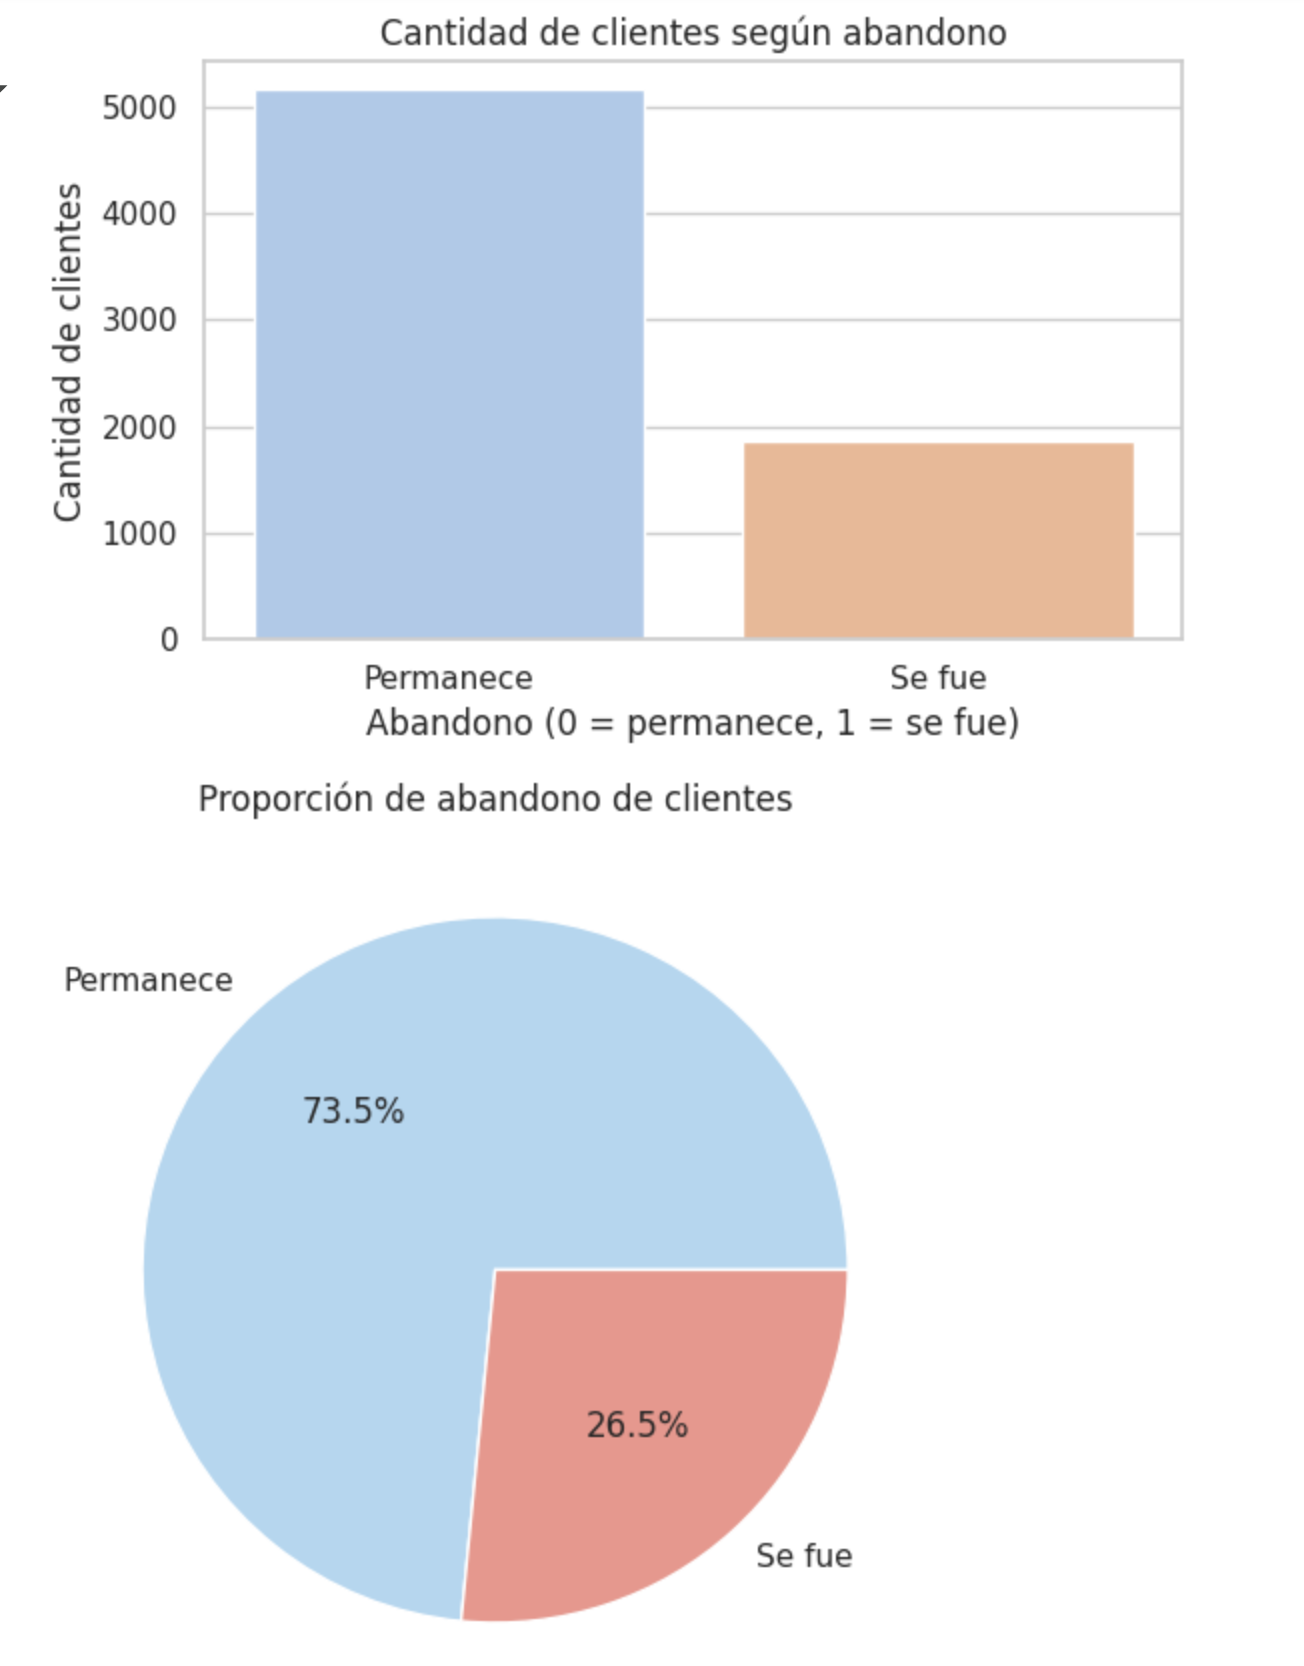

- **Comparaciones por variables categóricas**:
  - Los contratos mensuales presentan una tasa de evasión más alta.
  - Los clientes sin servicios adicionales como `soporte técnico` o `seguridad en línea` abandonan con más frecuencia.


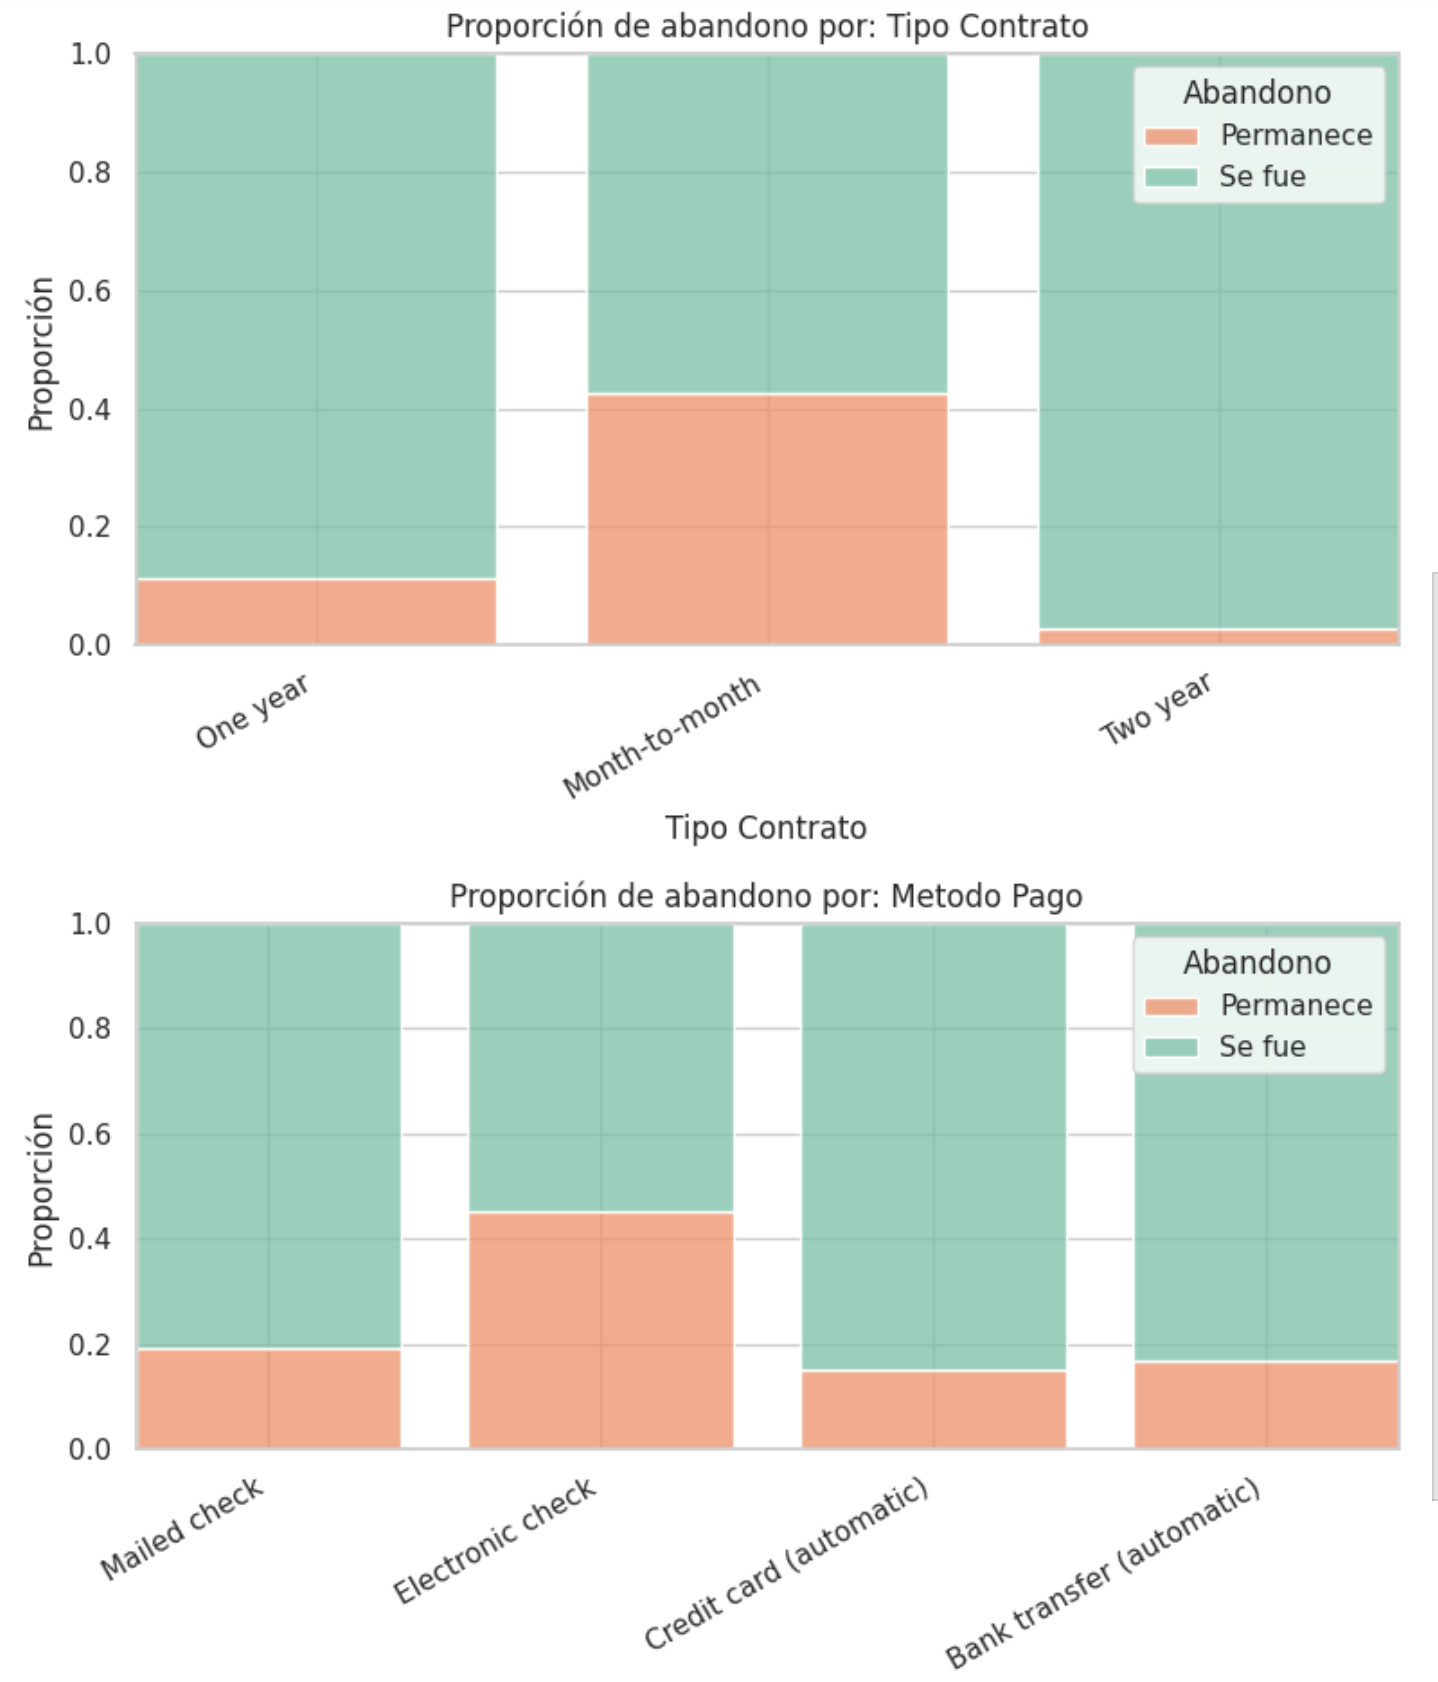

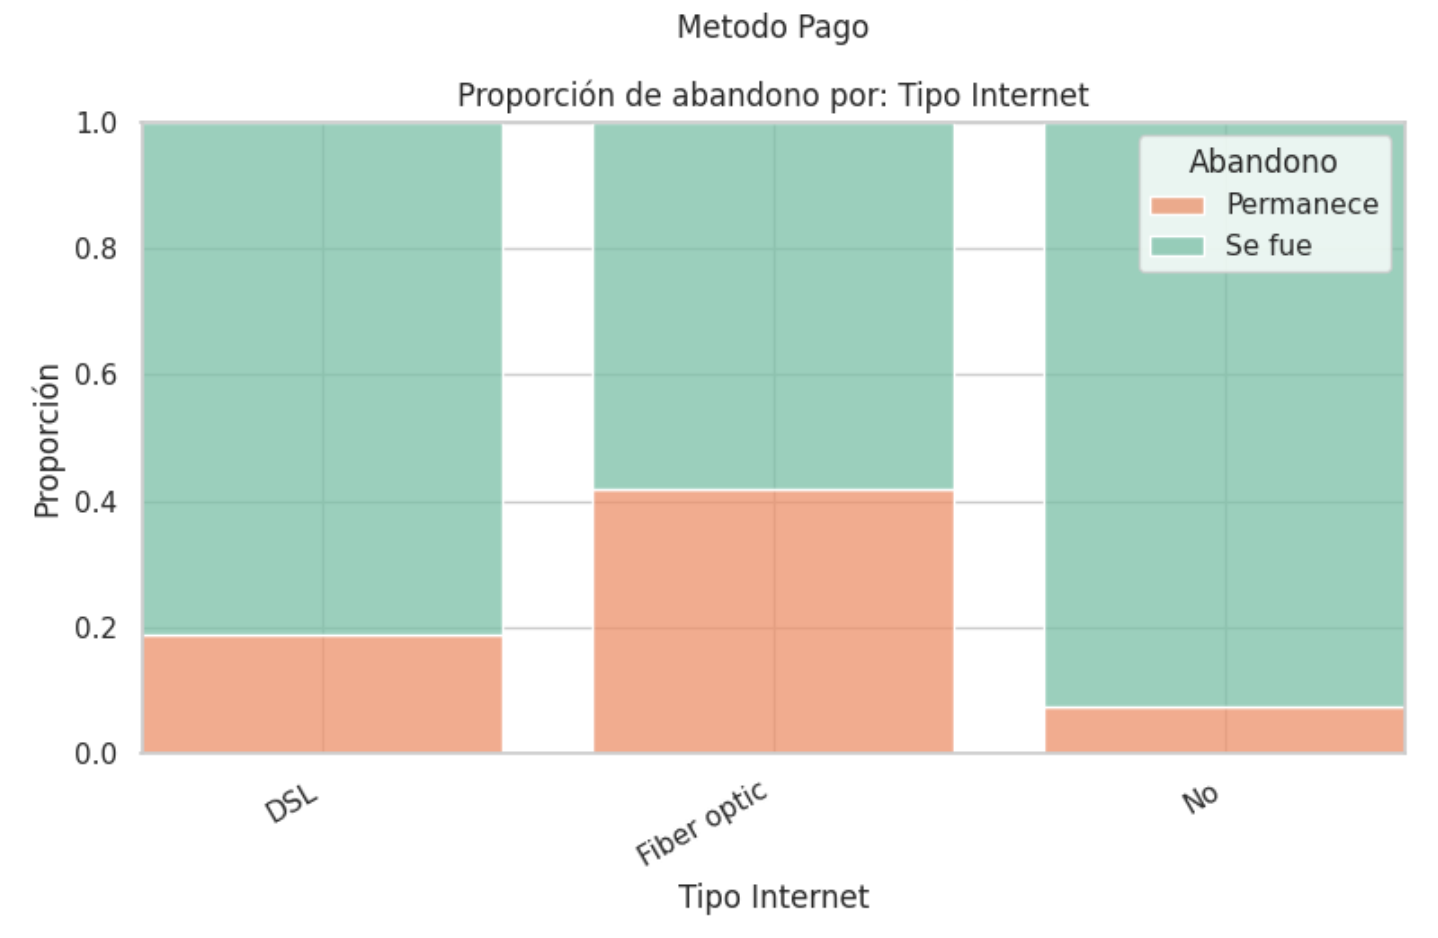

- **Comparaciones por variables numéricas**:
  - Los clientes que se fueron suelen tener menor tiempo de permanencia.
  - El gasto total de los clientes que abandonan tiende a ser más bajo, lo que sugiere menor compromiso o antigüedad.

---

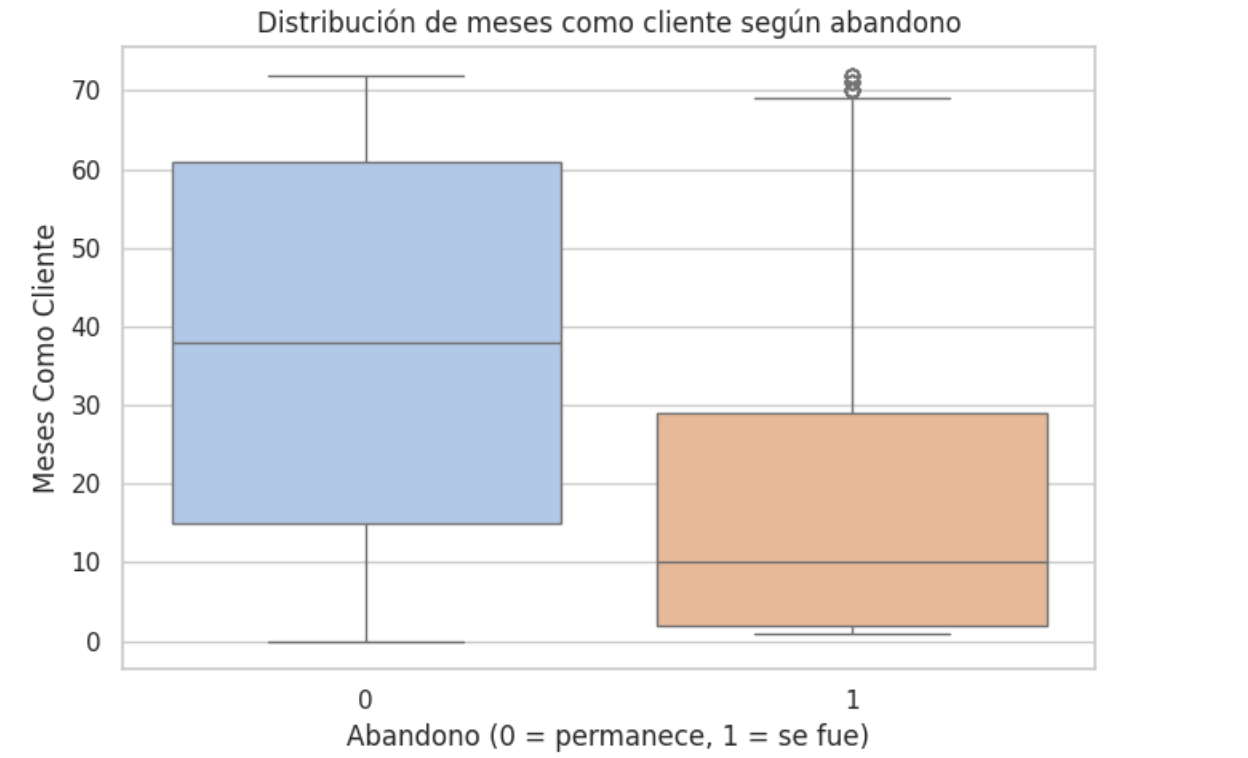

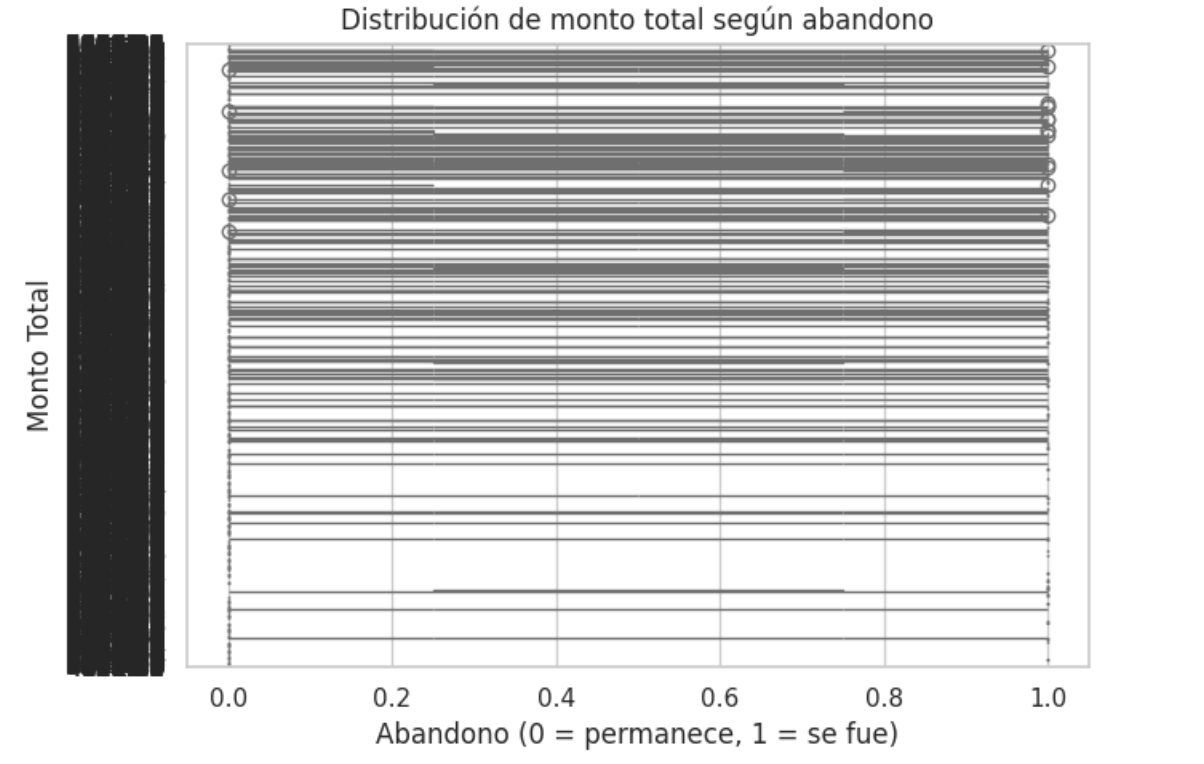

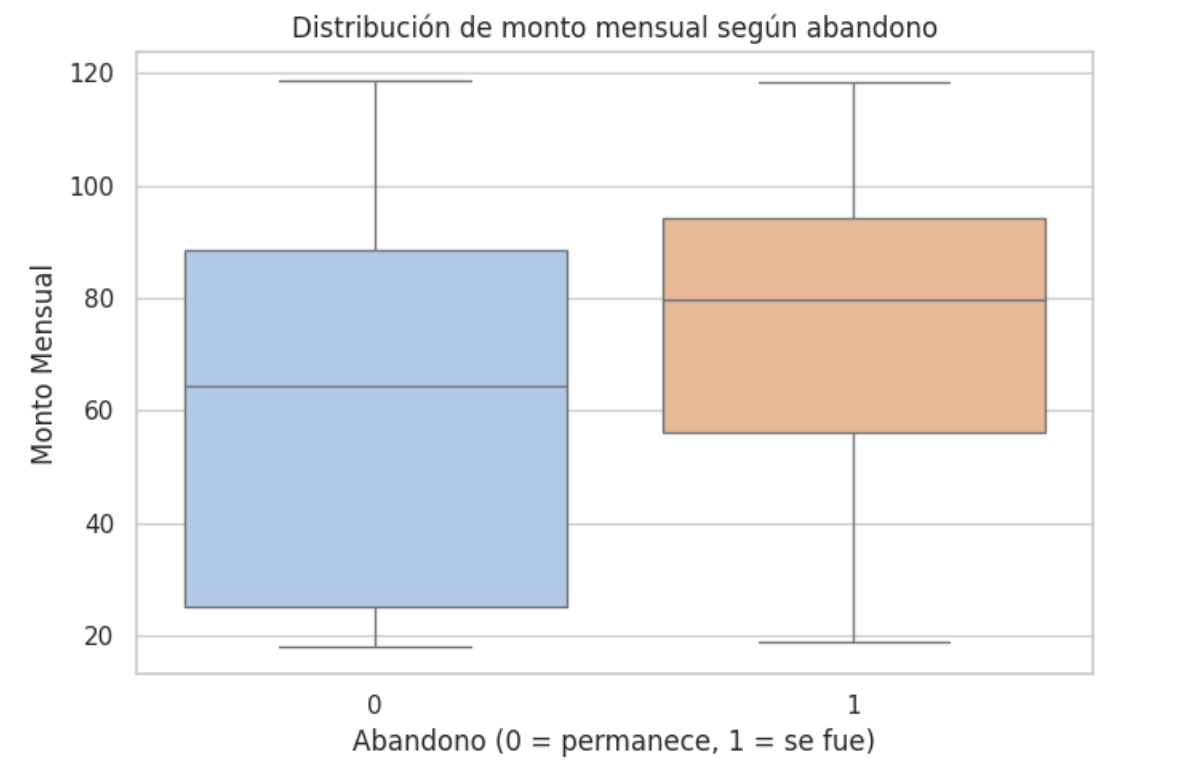

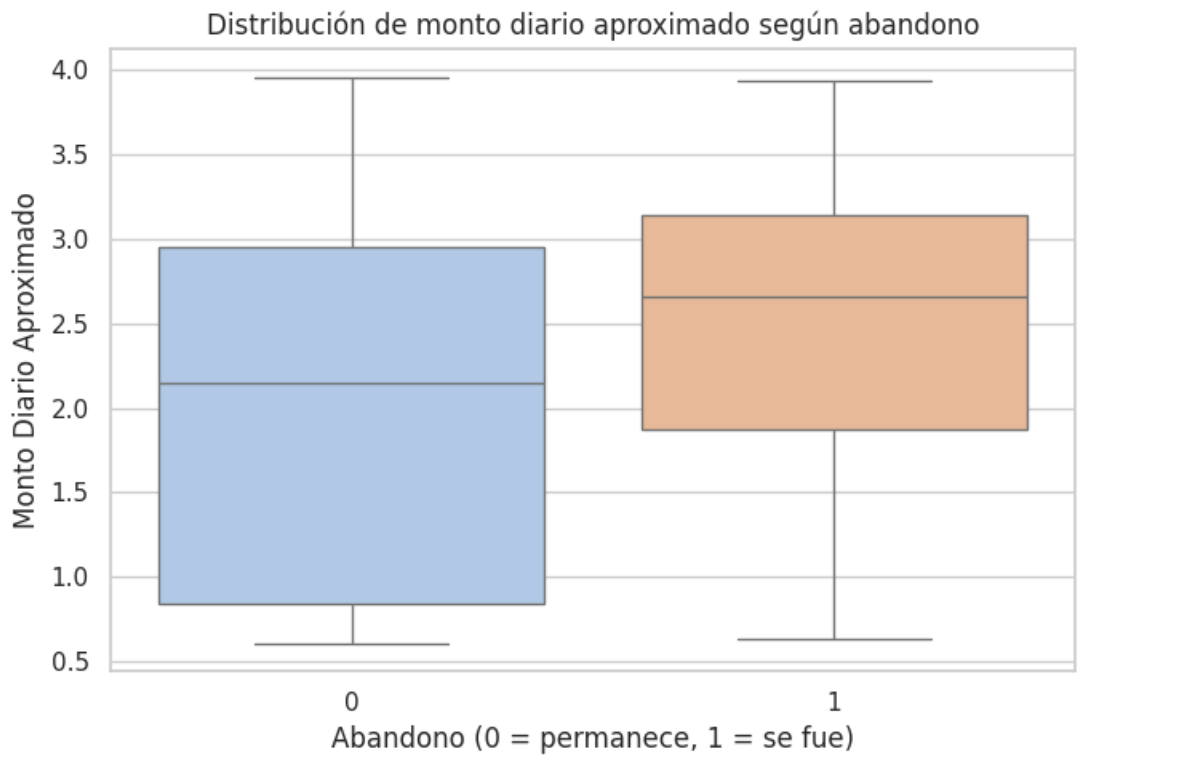

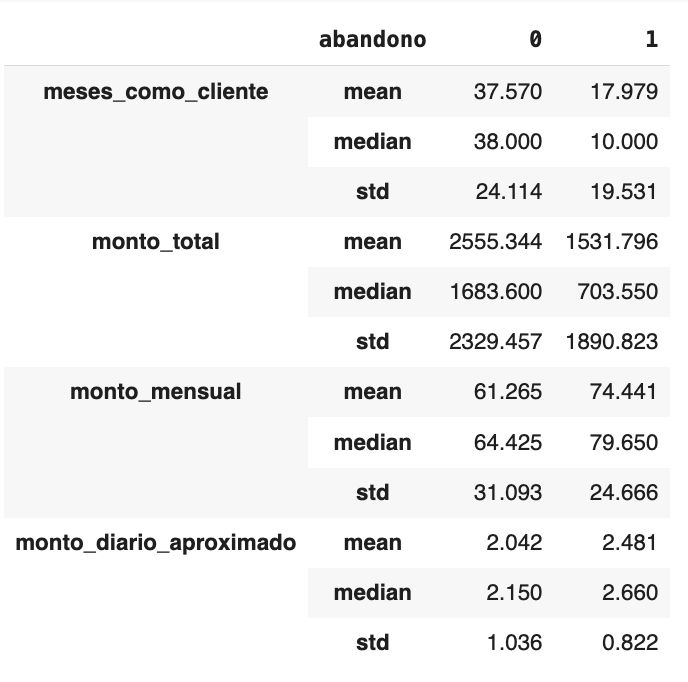

## 🔹 Conclusiones e Insights

- El **tipo de contrato** es un factor determinante: los contratos a largo plazo (1 o 2 años) retienen mejor a los clientes.
- Servicios adicionales como **seguridad en línea** y **soporte técnico** parecen estar relacionados con una mayor permanencia.
- **Clientes con poca antigüedad y bajo gasto** son los más propensos a abandonar.

---




## 🔹 Recomendaciones

1. **Incentivar contratos a largo plazo**, ofreciendo beneficios por fidelidad.
2. **Implementar programas de bienvenida y acompañamiento** para clientes nuevos (primeros meses críticos).
3. **Promover servicios adicionales** que generen mayor valor percibido como soporte técnico y seguridad.
4. **Monitorear de cerca a clientes con bajo uso o bajo gasto** y enviar campañas personalizadas de retención.
5. **Explorar modelos predictivos** a partir de este análisis para anticipar el churn y actuar preventivamente.

---

Este análisis proporciona una base sólida para tomar decisiones estratégicas orientadas a **reducir la evasión** y **mejorar la retención** de clientes en Telecom X.


---

## 🔹 Análisis Opcional: Correlación entre Variables

Como paso adicional, se realizó un análisis de **correlación** para entender mejor qué factores se asocian con la evasión de clientes (`abandono`). Este análisis es útil para la construcción futura de modelos predictivos.

### ✔ Correlación entre variables numéricas

Se construyó una matriz de correlación usando la función `corr()` de Pandas y se visualizó con un mapa de calor. Este análisis incluyó variables como:

- `meses_como_cliente`
- `monto_total`
- `monto_mensual`
- `monto_diario_aproximado`
- `abandono`

*Insertar aquí la matriz de correlación (heatmap)*

### ✔ Creación de la variable `cantidad_servicios`

Se sumaron todos los servicios contratados por cada cliente (telefonía, internet, soporte, streaming, etc.), convirtiendo respuestas `Yes` / `No` a 1 / 0. Así se obtuvo una nueva variable:

- `cantidad_servicios`: número total de servicios contratados por cliente

### ✔ Correlación entre `cantidad_servicios` y `abandono`

Al analizar esta relación, se observó que:

- **A menor cantidad de servicios, mayor probabilidad de abandono**
- Clientes con **más servicios contratados tienden a permanecer más tiempo**

*Insertar aquí el gráfico boxplot de cantidad de servicios vs. abandono*

---

### 📌 Insight adicional

El número de servicios contratados resulta ser una **variable clave** para evaluar el compromiso del cliente con la empresa. Puede utilizarse como predictor en futuros modelos de clasificación para anticipar el churn.

Este paso opcional permitió identificar **relaciones sutiles** que no siempre son evidentes con gráficos o estadísticas descriptivas simples.
